## This is a copy of dohyung's notebook with small tweaks

In [87]:
import numpy as np
import pandas as pd
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import matplotlib.pyplot as plt
import rasterio
import rasterio.mask as mask
import fiona
import geopandas as gpd
from shapely.geometry import box
from fiona.crs import from_epsg
from rasterio.plot import show
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

# change font
plt.rcParams['font.sans-serif'] = "Lato"
plt.rcParams['font.weight'] = "regular"
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

In [88]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

# plot population maps

In [89]:
def load_raster_data(country,bbox):
    # Get from here: ftp://ftp.worldpop.org.uk/GIS/Population/Global_2000_2020
    wp_file = '../data/worldpop/%s/%s_ppp_2015.tif' % (country, country.lower()) 
    # wp_file= '/home/vsekara/mb_data/magicbox-public/population/worldpop-tif/%s_ppp_2015.tif' % country.lower() 
    # try:
        # fb_file= '/home/vsekara/mb_data/turingdata2/data/Population/doModel/population/%s/fb_data/population_%s_2018-10-01.tif' % (country,country.lower())
    fb_file='../data/humdata/%s/population_%s_2018-10-01.tif' % (country, country.lower())
    # except:
        # fb_file= '/home/vsekara/mb_data/turingdata2/data/Population/doModel/population/%s/fb_data/population_%s_2019-07-01.tif' % (country,country.lower())
    # do_file= '/home/vsekara/mb_data/turingdata2/data/Population/doModel/population/%s/population_%s.tif' % (country,country)
    do_file = '../data/grid/%s/%s_population.tif' % (country, country.lower())

    raster_fb = rasterio.open(fb_file)
    raster_wp = rasterio.open(wp_file)
    raster_do = rasterio.open(do_file)

    # load data from raster 
    geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
    epsg_code = int(raster_wp.crs.data['init'][5:])
    # get features
    coords = getFeatures(geo)

    # mask rasters
    out_img, out_transform = mask.mask(raster_wp, coords, crop=True)
    pop_wp = np.float32(out_img[0].copy())
    # #pop_wp[np.where(pop_wp==-99999)]=np.nan
    pop_wp[np.where(pop_wp==-99999)]=0

    out_img, out_transform = mask.mask(raster_fb, coords, crop=True)
    pop_fb=np.float32(out_img[0].copy())
    pop_fb[np.where(pop_fb!=pop_fb)] = 0

    out_img, out_transform = mask.mask(raster_do, coords, crop=True)
    pop_do=np.float32(out_img[0].copy())
    pop_fb[np.where(pop_do!=pop_do)] = 0
    #img_arr3[np.where(img_arr3==0)]=np.nan
    
    return pop_wp, pop_fb, pop_do
    #,pop_fb,pop_do

In [90]:
#tam=0.05 # do's value
tam=0.1

cities = [
#    ('COD','Kinshasa',15.3152, -4.3880),
    #Lubumbashi
    #lon, lat = 27.4830,-11.6589
    #Mbuji-Mayi
    #lon, lat = 23.5637,-6.0657
    #Kikwit
    #lon, lat = 18.79890,-5.01462
    #beni
    #lon, lat = 29.4657,0.5333
    #goma
    # ('COD','goma',29.2069,-1.6520),
    # goma + volcano
    #lon, lat = 29.218166, -1.602993
    #beni
    #lon, lat = 29.4528,0.4990
    #bukavu
    #lon, lat = 28.853313,-2.518729
    #butembo
    # ('COD','butembo',29.301369,0.116350),
    #mambasa
    #lon, lat =29.036034,1.359520
    #komanda
    #lon, lat = 29.762964,1.366416
    #volcano
    #lon, lat =29.250240,-1.521514
    #kisangani
    #lon, lat =25.197619, 0.515245
    #lat, lon = 0.515245, 25.155647
    #lat, lon = 0.515245, 25.115647
    #lat, lon = 0.555245, 25.055647
    # ('DEU','berlin',13.406847,52.515158),
    # ('ARG','buenos-aires',-58.408807, -34.612950),
    
    # ('HTI','port-au-prince',-72.3388, 18.55),
    ('NGA','lagos',3.35, 6.5)
    # ('COL','bogota', -74.07,4.64)
]

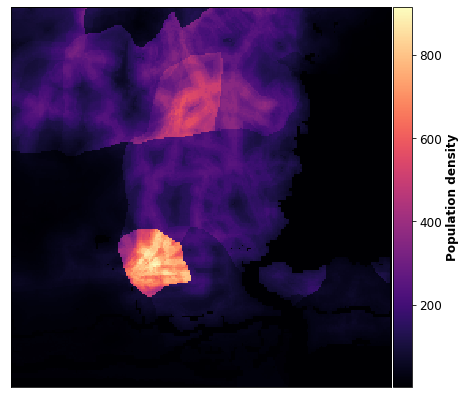

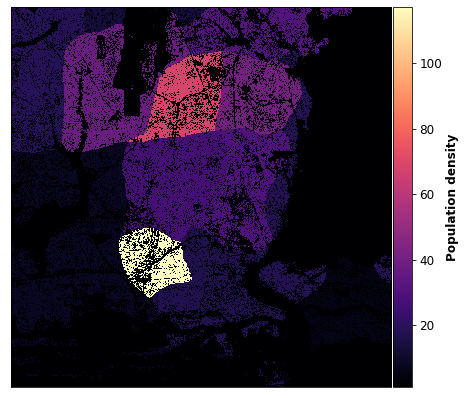

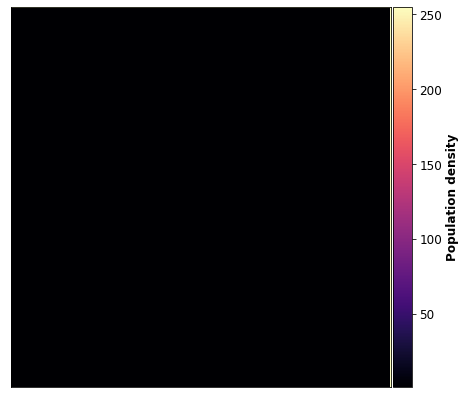

In [91]:
# iterate over countries
for country,city,lon,lat in cities:
    # load bbox
    bbox=box(lon-tam, lat-tam, lon+tam, lat+tam)
    # load rasters
    # pop_wp, pop_fb, pop_do = load_raster_data(country,bbox)
    pop_wp, pop_fb, pop_do = load_raster_data(country, bbox)
    
    # plot datasets
    # for pop_type,pop in [('wp',pop_wp),('fb',pop_fb),('do',pop_do)]:
    for pop_type,pop in [('wp', pop_wp), ('fb', pop_fb), ('do', pop_do)]:

        plt.figure(figsize=(8,7))
        ax = plt.subplot(111)
        cmap = plt.cm.magma

        plt.imshow(pop,cmap=cmap,vmin=1)

        cbar = plt.colorbar(pad=0.005,fraction=0.1)
        cbar.set_label('Population density', rotation=90)
        ax.axis('on')
        plt.xticks([])
        plt.yticks([])
        plt.savefig('../data/img/%s-%s-%s.png' % (country,city,pop_type),
                    dpi=300,bbox_inches='tight',pad_inches=0)
        plt.show()

__test__

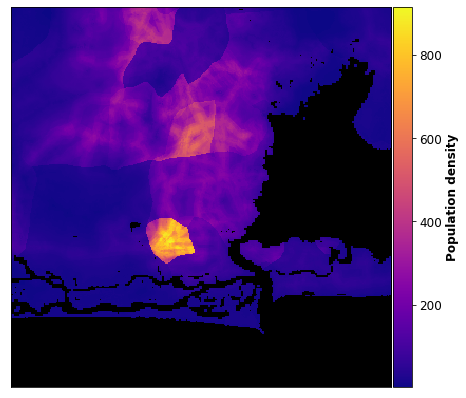

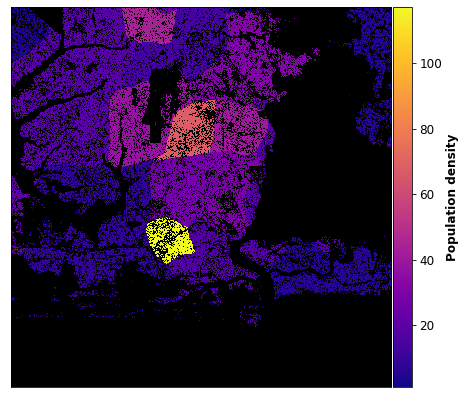

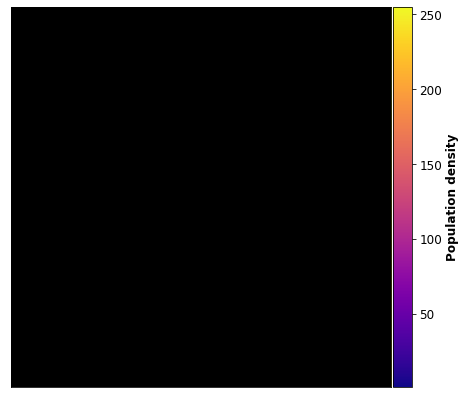

In [95]:
# iterate over countries
for country,city,lon,lat in cities[-1:]:
    tam = 0.15
    # load bbox
    bbox=box(lon-tam,lat-tam,lon+tam,lat+tam)
    # load rasters
    pop_wp, pop_fb, pop_do = load_raster_data(country,bbox)
    
    # plot datasets
    #for pop_type,pop in [('wp',pop_wp),('fb',pop_fb),('do',pop_do)]:
    for pop_type,pop in [('wp',pop_wp),('fb',pop_fb),('do',pop_do)]:

        plt.figure(figsize=(8,7))
        ax = plt.subplot(111)
        cmap = plt.cm.plasma
        cmap.set_under('black',1)

        plt.imshow(pop,cmap=cmap,vmin=1)

        cbar = plt.colorbar(pad=0.005,fraction=0.1)
        cbar.set_label('Population density', rotation=90)
        ax.axis('on')
        plt.xticks([])
        plt.yticks([])
        #plt.savefig('/home/vsekara/mb_data/turingdata2/code/vsekara/plots/population-paper/pop-tiles/%s-%s-%s.png' % (country,city,pop_type),
        #            dpi=300,bbox_inches='tight',pad_inches=0)
        plt.show()

# plot satellite imagery

In [98]:
#tam=0.05 # do's value
tam=0.1

cities = [
#    ('COD','Kinshasa',15.3152, -4.3880),
    #Lubumbashi
    #lon, lat = 27.4830,-11.6589
    #Mbuji-Mayi
    #lon, lat = 23.5637,-6.0657
    #Kikwit
    #lon, lat = 18.79890,-5.01462
    #beni
    #lon, lat = 29.4657,0.5333
    #goma
    # ('COD','goma',29.2069,-1.6520),
    # goma + volcano
    #lon, lat = 29.218166, -1.602993
    #beni
    #lon, lat = 29.4528,0.4990
    #bukavu
    #lon, lat = 28.853313,-2.518729
    #butembo
    # ('COD','butembo',29.301369,0.116350),
    #mambasa
    #lon, lat =29.036034,1.359520
    #komanda
    #lon, lat = 29.762964,1.366416
    #volcano
    #lon, lat =29.250240,-1.521514
    #kisangani
    #lon, lat =25.197619, 0.515245
    #lat, lon = 0.515245, 25.155647
    #lat, lon = 0.515245, 25.115647
    #lat, lon = 0.555245, 25.055647
    
    # ('ARG','buenos-aires',-58.408807, -34.612950),
    
    # ('HTI','port-au-prince',-72.3388, 18.55),
    ('NGA','lagos',3.35, 6.5)
]

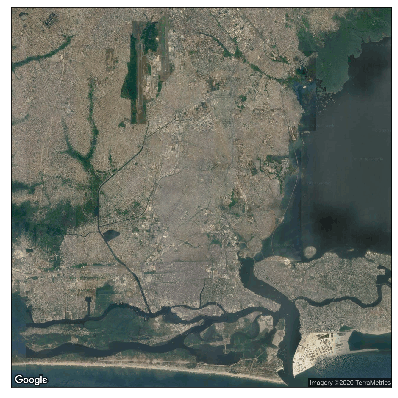

In [101]:
for country,city,lon,lat in cities:
    
    bbox=box(lon-tam,lat-tam,lon+tam,lat+tam)
    
    # to use an API key and set it here with key='YOUR_API_KEY'
    g = GoogleVisibleMap(x=[lon-tam, lon+tam], y=[lat-tam, lat+tam],
                         #size_x=img_arr1.shape[0], size_y=img_arr1.shape[1],
                         scale=4,  # scale is for more details
                         maptype='satellite'
                        )  # try out also: 'terrain'

    # the google static image is a standard rgb image
    ggl_img = g.get_vardata()
    plt.figure(figsize=(7,7))
    plt.imshow(ggl_img)
    #plt.set_title('Satellite image')
    ax.axis('on')
    plt.xticks([])
    plt.yticks([])
    plt.savefig('../data/img/%s-%s-satellite.png' % (country,city),
                dpi=300,bbox_inches='tight',pad_inches=0)
    plt.show()

__test__

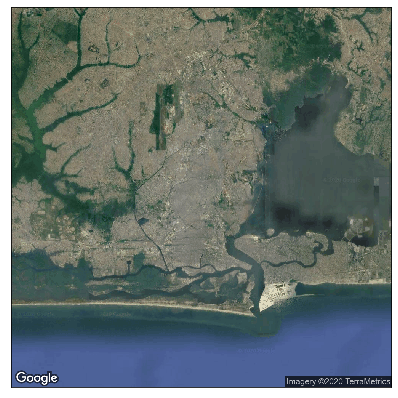

In [102]:
for country,city,lon,lat in cities[:1]:
    
    bbox=box(lon-tam,lat-tam,lon+tam,lat+tam)
    
    # to use an API key and set it here with key='YOUR_API_KEY'
    g = GoogleVisibleMap(x=[lon-tam, lon+tam], y=[lat-tam, lat+tam],
                         size_x = 500, size_y = 500,
                         #size_x=img_arr1.shape[0], size_y=img_arr1.shape[1],
                         scale=4,  # scale is for more details
                         maptype='satellite'
                        )  # try out also: 'terrain'

    # the google static image is a standard rgb image
    ggl_img = g.get_vardata()
    plt.figure(figsize=(7,7))
    plt.imshow(ggl_img)
    #plt.set_title('Satellite image')
    ax.axis('on')
    plt.xticks([])
    plt.yticks([])
    #plt.savefig('/home/vsekara/mb_data/turingdata2/code/vsekara/plots/population-paper/pop-tiles/%s-%s-satellite.png' % (country,city),
    #            dpi=300,bbox_inches='tight',pad_inches=0)
    plt.show()

# TEST

In [104]:
country = 'NGA'
#do_file= '/home/vsekara/mb_data/turingdata2/data/Population/doModel/population/%s/population_%s.tif' % (country,country)
#raster_pop = rasterio.open(do_file)
wp_file = '../data/worldpop/%s/%s_ppp_2015.tif' % (country, country.lower())
raster_pop = rasterio.open(wp_file)



# pop_fb[np.where(pop_fb!=pop_fb)] = 0

# out_img, out_transform = mask.mask(raster_do, coords, crop=True)
# pop_do=np.float32(out_img[0].copy())
# #pop_fb[np.where(pop_do!=pop_do)] = 0
# #img_arr3[np.where(img_arr3==0)]=np.nan

# return pop_wp,pop_fb,pop_do

In [105]:
X = raster_pop.read(1)

In [106]:
X[np.where(X==-99999)]=0

In [107]:
from matplotlib.colors import LogNorm

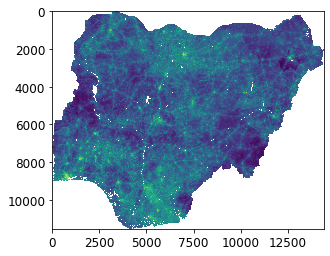

In [108]:
plt.figure()
plt.imshow(X,norm=LogNorm())
plt.show()